In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False

In [61]:
# 鸢尾花数据集

In [62]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.columns

In [ ]:
X = np.array([5, 2.7, 2.1, 0.4])

In [ ]:
df

In [ ]:
# 散点图，随意两个特征，不同类别，颜色不同区分

x_1 = df[df.target==0]['sepal length (cm)']
y_1 = df[df.target==0]['sepal width (cm)']

x_2 = df[df.target==1]['sepal length (cm)']
y_2 = df[df.target==1]['sepal width (cm)']

x_3 = df[df.target==2]['sepal length (cm)']
y_3 = df[df.target==2]['sepal width (cm)']

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)
plt.scatter(x_3, y_3)
plt.legend(['0','1','2'])
plt.show()

def KNN(x_train,y_label,k,X):  
1.x_train :数据集特征   
2.y_label：对应的标签  
3.K：邻居的个数  
4.X ：未知的数据



1. X 与 xtrain 的距离
2. 选择 K个最近距离的标签
3. y_pre 返回标签的众数（分类问题）

In [ ]:
df.iloc[:,:4]     # X = np.array([5, 2.7, 2.1, 0.4])

In [ ]:
dist = df.iloc[:,:4] - X
dist = np.sum(dist**2, axis=1)
df['dist'] = dist

In [ ]:
a = df.nsmallest(3, columns='dist')['target']
a.mode()

In [ ]:
# def KNN(x_train,y_label,k,X):  
# 1.x_train :数据集特征   
# 2.y_label：对应的标签  
# 3.K：邻居的个数  
# 4.X ：未知的数据



# 1. X 与 xtrain 的距离
# 2. 选择 K个最近距离的标签
# 3. y_pre 返回标签的众数（分类问题）

def knn(x_train, y_label, k, X):
    x_train = pd.DataFrame(x_train)
    distance = np.sum((x_train - X)**2, axis=1)
    x_train['distance'] = distance
    x_train['label'] = y_label
    y_pre = x_train.nsmallest(k, columns='distance')['label'].mode(0)
    return y_pre

In [ ]:
knn(df.iloc[:,:4], df['target'],3, X)

# 改进版

In [ ]:
X = np.array([5.3, 2.7, 6.4, 1.3])
x_train = iris.data
y_label = iris.tatget

# 改进版
def KNN(x_train,y_train,n_neighbours,X):
    
    knn_list = []
    #K个邻居，【（X和x_train第一个样本点的距离，y_train：第一个样本点的标签）】
    for i in range(n_neighbours):
        dist = np.linalg.norm(X - x_train[i],ord = 2)
        #dist ：返回X和样本点的距离
        knn_list.append((dist,y_train[i]))
        
        #将结果存入knn_list

    for i in range(n_neighbours,len(x_train)):
        #从第四（k）个点开始迭代
        max_index = knn_list.index(max(knn_list , key = lambda x:x[0]))
        #返回原本knn_list的最大dist的索引        
        dist = np.linalg.norm(X - x_train[i],ord = 2)
        #计算X和第4（k）个点的距离
        if knn_list[max_index][0]>dist:
            knn_list[max_index] = (dist,y_train[i])
        #如果原本的点的距离大于新点的距离，那么，我们就把新点的距离和标签，替换到knn_list里面。


    knn = [k[-1] for k in knn_list]
    #knn 返回，原本knn_list里的所有标签
    max_count = np.mean(knn)
    # 返回标签的平均值
      
#     count_pairs = Counter(knn)
#     max_count = sorted(count_pairs.items() ,key = lambda x:x[1])[-1][0]
#     #计算所有标签的频数，并返回频数最大的标签


    return max_count

In [ ]:
list1 = [(100,2),(300,1),(250,7),(234,7),(89,2),(345,2)]
for i in range(len(list1)):
    print(list1[i][1])

In [51]:
list2 = [x[1]for x in list1]
a = dict(Counter(list2))
a

{2: 3, 1: 1, 7: 2}

In [53]:
sorted(a, key=a.get)[-1]

2

# KNN一般过程步骤（鸢尾花数据集）

In [64]:
x = iris.data   # 特征
y = iris.target    # 标签

In [67]:
# 1、划分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100)
# x_train 训练集特征、x_test 测试集特征、 y_train 训练集标签、y_test 测试集标签

In [69]:
# 训练模型
from sklearn.neighbors import KNeighborsClassifier  # KNN 分类
from sklearn.neighbors import KNeighborsRegressor   # KNN 回归

In [70]:
# 实例化

knn_clf = KNeighborsClassifier(n_neighbors=5, p=2)  
# n_neighbors: 邻居个数 ， p: 范数，类似上面的ord，一般都是2

In [ ]:
# 带入训练集，训练
knn_clf.fit(x_train, y_train)

In [ ]:
# 预测数据
knn_clf.predict(x_test)   # 当输入的一维数组，会报错，先把它变成二维数组

In [73]:
# 查询准确率
knn_clf.score(x_test, y_test)

0.9777777777777777

In [93]:
# 找出最好的邻居数

scores = []
for i in range(1, 10):
    knn_clf = KNeighborsClassifier(n_neighbors=i, p=2)
    knn_clf.fit(x_train, y_train)
    knn_clf.predict(x_test) 
    scores.append(knn_clf.score(x_test, y_test))
 

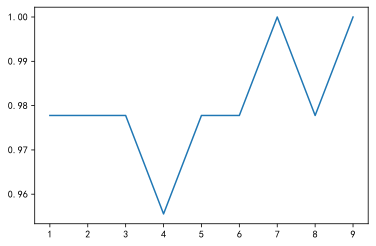

In [94]:
# 学习曲线
plt.plot([i for i in range(1, 10)], scores)


In [95]:
knn = KNeighborsClassifier(7).fit(x_train, y_train)

In [100]:
knn.predict(x_test)
knn.score(x_test, y_test)

1.0